In [424]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [425]:
def decode_setup(s):
    d = s.split('_')
    r = {}
    r['augmentation_data'] = d[0]
    d1_map = {
        'scratch': 0,
        '5k': 5000,
        '10k': 10000,
        '20k': 20000,
        '100k': 100000,
        'full': 391722
    }
    d2_map = {
        '73k': 73080,
        '36k': 36040,
        '18k': 18020,
        '0k': 0
    }
    r['starting_train_size'] = d1_map[d[1]]
    r['augmentation_train_size'] = d2_map[d[2]]
    return r

In [426]:
all_results = []
for filename in os.listdir('./results'):
    if filename.endswith('.txt'):
        with open(f'./results/{filename}') as f:
            curr_data = f.read().splitlines()
            curr_result = []
            curr_setup = curr_data[1]
            for i in range(3, len(curr_data), 2):
                curr_result.append(
                    {**decode_setup(curr_setup), **{'dataset': curr_data[i][:-2]}, **eval(curr_data[i+1])}
                )
            all_results += curr_result
# deal with starting
ad_set = set([r['augmentation_data'] for r in all_results]) - set({'starting'})
for r in all_results:
    if r['augmentation_data'] == 'starting':
        base_starting_result = {key: value for key, value in r.items() if key != 'augmentation_data'}
        for ad in ad_set:
            r_add = {**base_starting_result, **{'augmentation_data': ad}}
            all_results.append(r_add)
df = pd.DataFrame([x for x in all_results if x['augmentation_data'] != 'starting'])



In [427]:
df.sort_values(by=['augmentation_data', 'starting_train_size', 'augmentation_train_size', 'dataset'], inplace=True)
df


,augmentation_data,starting_train_size,augmentation_train_size,dataset,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,eval_model_preparation_time
454,original,0,0,HANS,3.193707,0.500000,370.2595,81.024,2.533,0.0087
457,original,0,0,HANS - lexical overlap,3.247627,0.500000,122.3102,81.759,2.559,0.0084
460,original,0,0,HANS - lexical overlap and non-entailment,2.013139,1.000000,60.9525,82.031,2.576,0.0083
442,original,0,0,matched,2.328736,0.327967,266.8352,36.783,1.151,0.0105
445,original,0,0,matched 2-label,2.328736,0.645543,267.1451,36.740,1.149,0.0085
...,...,...,...,...,...,...,...,...,...,...
363,synthetic-biased,391722,73080,HANS - lexical overlap and non-entailment,7.807431,0.419200,61.1477,81.769,2.568,NaN
357,synthetic-biased,391722,73080,matched,3.427384,0.629954,268.0125,36.621,1.145,NaN
358,synthetic-biased,391722,73080,matched 2-label,3.427384,0.668976,267.9392,36.631,1.146,NaN
359,synthetic-biased,391722,73080,mismatched,3.390925,0.631054,270.3545,36.352,1.139,NaN


In [428]:
set(df.dataset)

{'HANS',
 'HANS  - lexical overlap',
 'HANS  - lexical overlap and non-entailment',
 'matched',
 'matched 2-label',
 'mismatched',
 'mismatched 2-label'}

In [429]:
#df.groupby(['augmentation_data', 'starting_train_size', 'dataset'])
df_sa = df.query('augmentation_train_size == 0')[['augmentation_data', 'starting_train_size', 'dataset', 'eval_accuracy']].rename(columns={'eval_accuracy': 'starting_accuracy'})
df_diff = df.merge(df_sa, on=['augmentation_data', 'starting_train_size', 'dataset'], how='left')
df_diff['accuracy_diff'] = df_diff.eval_accuracy - df_diff.starting_accuracy
df_diff



,augmentation_data,starting_train_size,augmentation_train_size,dataset,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,eval_model_preparation_time,starting_accuracy,accuracy_diff
0,original,0,0,HANS,3.193707,0.500000,370.2595,81.024,2.533,0.0087,0.500000,0.000000
1,original,0,0,HANS - lexical overlap,3.247627,0.500000,122.3102,81.759,2.559,0.0084,0.500000,0.000000
2,original,0,0,HANS - lexical overlap and non-entailment,2.013139,1.000000,60.9525,82.031,2.576,0.0083,1.000000,0.000000
3,original,0,0,matched,2.328736,0.327967,266.8352,36.783,1.151,0.0105,0.327967,0.000000
4,original,0,0,matched 2-label,2.328736,0.645543,267.1451,36.740,1.149,0.0085,0.645543,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
499,synthetic-biased,391722,73080,HANS - lexical overlap and non-entailment,7.807431,0.419200,61.1477,81.769,2.568,NaN,0.959200,-0.540000
500,synthetic-biased,391722,73080,matched,3.427384,0.629954,268.0125,36.621,1.145,NaN,0.911055,-0.281100
501,synthetic-biased,391722,73080,matched 2-label,3.427384,0.668976,267.9392,36.631,1.146,NaN,0.941620,-0.272644
502,synthetic-biased,391722,73080,mismatched,3.390925,0.631054,270.3545,36.352,1.139,NaN,0.911376,-0.280322


In [430]:
df = df_diff

In [431]:
"""
key: (original/sythetic, 0-391722, matched/HANS)
value: (line, color)
"""

dt_line_map = {
    'original': '--',
    'synthetic': '-',
    'synthetic-biased': ':'
}

ds_color_map = {
    'matched': 'navy',
    'HANS': 'brown',
    'HANS  - lexical overlap and non-entailment': 'grey',
}

sp_marker_map = {
    0: 'o',
    5000: 'o',
    10000: 'o',
    20000: 'o',
    100000: 'o',
    391722: 'o',
}

def build_setting_query(setting):
    return f'augmentation_data == "{setting[0]}" and starting_train_size == {setting[1]} and dataset == "{setting[2]}"'

def build_setting_style(setting):
    return {'fmt': f'{dt_line_map[setting[0]]}{sp_marker_map[setting[1]]}', 'c': ds_color_map[setting[2]]}

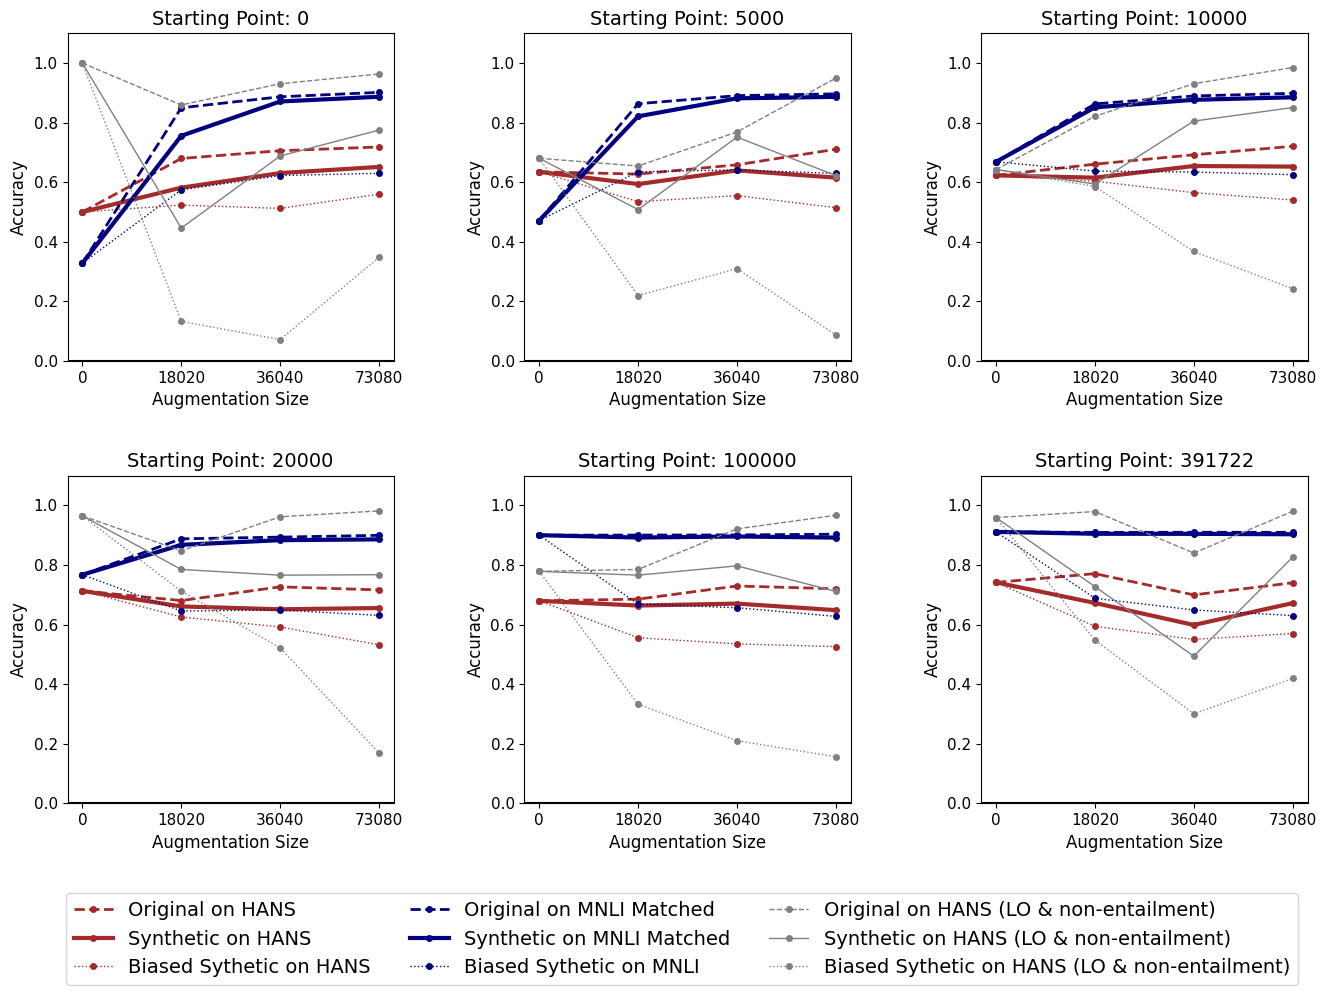

In [432]:
def plot_setting_orig(setting):
    if setting[0] == 'synthetic' and setting[2] in ['HANS', 'matched']:
        lw = 3.0
    elif setting[0] == 'original' and setting[2] in ['HANS', 'matched']:
        lw =2.0
    else:
        lw = 1.0
    plt.plot(df.query(build_setting_query(setting))['augmentation_train_size'].astype(str), df.query(build_setting_query(setting))['eval_accuracy'], build_setting_style(setting)['fmt'], c=build_setting_style(setting)['c'], markersize=4, linewidth=lw)

def plot_setting_diff(setting):
    if setting[0] == 'synthetic' and setting[2] in ['HANS', 'matched']:
        lw = 3.0
    elif setting[0] == 'original' and setting[2] in ['HANS', 'matched']:
        lw =2.0
    else:
        lw = 1.0
    plt.plot(df.query(build_setting_query(setting))['augmentation_train_size'].astype(str), df.query(build_setting_query(setting))['accuracy_diff'], build_setting_style(setting)['fmt'], c=build_setting_style(setting)['c'], markersize=4, linewidth=lw)

plot_setting = plot_setting_orig

augsize_map = {
    1: 0,
    2: 5000,
    3: 10000,
    4: 20000,
    5: 100000,
    6: 391722
}

fig = plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.35)

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plot_setting(('original', augsize_map[i], 'HANS'))
    plot_setting(('synthetic', augsize_map[i], 'HANS'))
    plot_setting(('synthetic-biased', augsize_map[i], 'HANS'))
    plot_setting(('original', augsize_map[i], 'matched'))
    plot_setting(('synthetic', augsize_map[i], 'matched'))
    plot_setting(('synthetic-biased', augsize_map[i], 'matched'))
    plot_setting(('original', augsize_map[i], 'HANS  - lexical overlap and non-entailment'))
    plot_setting(('synthetic', augsize_map[i], 'HANS  - lexical overlap and non-entailment'))
    plot_setting(('synthetic-biased', augsize_map[i], 'HANS  - lexical overlap and non-entailment'))
    # plt.legend(['Original on HANS', 'Synthetic on HANS', 'Biased Sythetic on HANS', 'Original on MNLI Matched', 'Synthetic on MNLI Matched', 'Biased Sythetic on MNLI'], loc=(0.35, 0.5), handlelength=4)
    plt.xlabel('Augmentation Size', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim([0.0, 1.1])
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.title(f"Starting Point: {augsize_map[i]}", fontsize=14)
    plt.axhline(y = 0.0, color = 'k', linestyle = '-') 


lgd = fig.legend([
        'Original on HANS', 
        'Synthetic on HANS', 
        'Biased Sythetic on HANS', 
        'Original on MNLI Matched', 
        'Synthetic on MNLI Matched', 
        'Biased Sythetic on MNLI',
        'Original on HANS (LO & non-entailment)', 
        'Synthetic on HANS (LO & non-entailment)', 
        'Biased Sythetic on HANS (LO & non-entailment)', 
    ], bbox_to_anchor=(0.9, 0.03), ncol=3, prop={'size': 14})
# fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the global legend
plt.savefig('output_new_large.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


